[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dbwilburn/BIOC6765/blob/main/probability_simulations.ipynb)

### Python data science basics and likelihood calculations

***

DBW 2023-01-17

To make best use of this notebook, Edit > Clear all outputs, then run desired cells sequentially

This is a **markdown cell** where information can be written and formatted in various ways using different flags.

#### Header sizes can be small-ish

### or bigger

## or extra big

## plus **bolded** or *italicized*

***
with lines and other features too
***

***
The other major cell type are **code cells** that contain Python code that can be executed through a connected iPython server

Install the required packages; for docs for details

Numpy: https://numpy.org/doc/
<br>
Pandas: https://pandas.pydata.org/docs/
<br>
Scipy: https://docs.scipy.org/doc/scipy/
<br>
Matplotlib: https://matplotlib.org/stable/index.html
<br>

*If already installed, can comment out the next line, or just not run the cell*

In [1]:
!pip install numpy pandas scipy matplotlib

Then import the required libraries. 

By using the  `import X as Y`  structure, we can give nicknames to libraries that can make things quicker to type. This is extremely common for popular libraries such as numpy, pandas, and matplotlib that are used frequently when coding in Python

We can also selectively import some functions from libraries by using the structure  `from library.sub_library import function` 

In [19]:
## Numpy and Pandas for numerical operations and data frames, respectively
import numpy as np, pandas as pd

## Matplotlib for data visualization
import matplotlib.pyplot as plt

## Import curve fit and stats sublibrary from scipy
from scipy.optimize import curve_fit
import scipy.stats as stats


Next, let's simulate some data to do some basic analyses

In [4]:
## Generate 21 points that are equally spaced from 0 to 10

xt = np.linspace( 0, 10, 21 ) # Linspace takes ( start, end, n_points )

xt

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [5]:
## np.arange works similarly, but uses the step size rather than the # of points

## It is standard practice in bounds that bounds are left inclusive and right exclusive, i.e. [L,U)
## So if we want to include 10.0 as the final point, we need to set the final point to 10.5

arange_xt = np.arange( 0, 10.5, 0.5, ) # ( lower bound, upper bound, step size )

xt == arange_xt

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Let's linearly transform the data with slope = 2 and intercept = 1, plus add some gaussian noise with $\mu$ = 0 and $\sigma$ = 1.5

Normally, calling a random generator like rvs will produce semi-random values, but by fixing the seed (the `random_state`), then the values will be deterministic

In [10]:
seed = 3447

yt = 2*xt + 1 + stats.norm.rvs( loc=0, scale=1.5, size=len(xt), random_state=seed, )
yt

array([ 2.06747086,  3.68335847,  2.84990357,  5.77187016,  6.16209308,
        6.45058206,  9.68854343,  8.51799846,  9.98448286, 12.60752005,
       10.91477766, 14.20489117, 12.81274999, 16.42732583, 13.74888787,
       16.96915345, 16.5763266 , 18.4571479 , 17.28472798, 20.11522813,
       22.24447658])

Let's link the X and Y values into a data frame, and give them column names

In [11]:
## We can initialize pandas data frames using python dictionaries where key = column name, value = arrays of values

df = pd.DataFrame( { 'X_values' : xt, 'Y_values': yt, } )

df

,X_values,Y_values
0,0.0,2.067471
1,0.5,3.683358
2,1.0,2.849904
3,1.5,5.771870
4,2.0,6.162093
5,2.5,6.450582
6,3.0,9.688543
7,3.5,8.517998
8,4.0,9.984483
9,4.5,12.607520


We can save these data as a CSV file and read them back in as a new data frame

In [14]:
output_filename = 'probability_simulations_data1.csv'

df.to_csv( output_filename, header=True, index=False )

read_df = pd.read_csv( output_filename,  )

read_df

,X_values,Y_values
0,0.0,2.067471
1,0.5,3.683358
2,1.0,2.849904
3,1.5,5.771870
4,2.0,6.162093
5,2.5,6.450582
6,3.0,9.688543
7,3.5,8.517998
8,4.0,9.984483
9,4.5,12.607520


Use matplotlib to make a scatter plot of the data

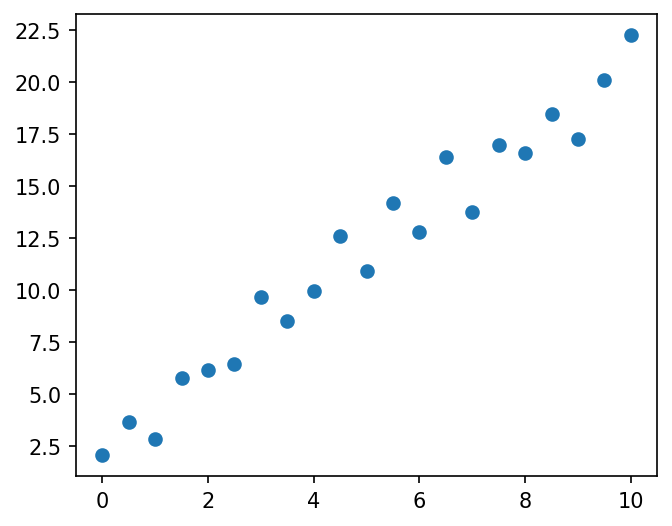

In [15]:
## The visual outputs of matplotlib are organized into Figures with Axes. 
## The simplest way to set this up is to initialize both using the plt.subplots command

## One axis in the figure
fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df.X_values, df.Y_values, )

We can add a line of best fit using the  `scipy.linregress` function

In [18]:
linear_model = stats.linregress( df.X_values, df.Y_values )
linear_model

LinregressResult(slope=1.860347913846562, intercept=2.4858564380294546, rvalue=0.9814897950493522, pvalue=4.226789431044718e-15, stderr=0.08327854262497955, intercept_stderr=0.48678190028266416)

In [21]:
## The results file is a named list, and we can extract elements out by using the list indices
m, b, r, p = linear_model[:4]

Slope should be 2 and intercept should be 1; intercept is a bit off, but also has a higher standard error

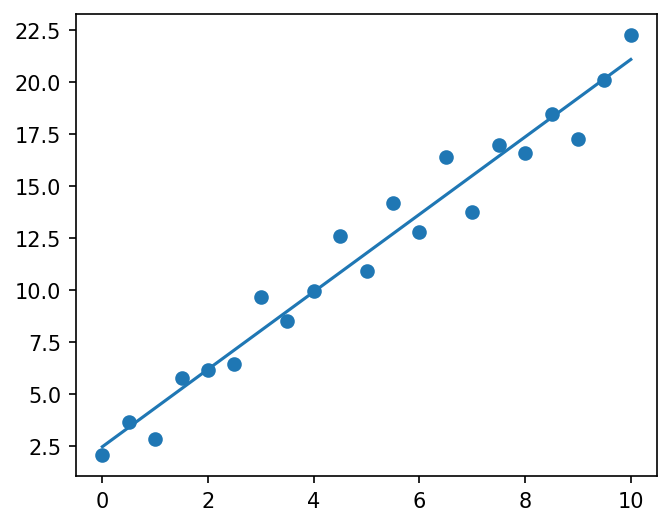

In [23]:
## Let's draw the best fit line

df[ 'fit_y' ]  = m*df.X_values + b

fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df.X_values, df.Y_values, )
ax.plot( df.X_values, df.fit_y, )

Not too bad. Since we modeled the data as **y = mx + b + N(0,1.5)** then we should expect the residuals **y - (mx+b)** to have sample mean = 0 and sample standard deviation = 1.5. Let's check...

In [26]:
df[ 'residuals' ] = df.Y_values - df.fit_y

## For a pandas column, we can use .describe() to get a general summary of the data; std here is sample std dev and includes the 1/(N-1) correction
df.residuals.describe()

count    2.100000e+01
mean     1.416856e-15
std      1.126186e+00
min     -1.944260e+00
25%     -7.923131e-01
50%     -4.393349e-02
75%      5.306877e-01
max      1.849208e+00
Name: residuals, dtype: float64

In [34]:
## The .describe() command only works for pandas columns. We can generate similar outputs using numpy commands as well

np.mean( df.residuals )

1.4168560504740094e-15

In [40]:
np.quantile( df.residuals, [ 0.25, 0.50, 0.75, ] ) ## Can provide a list of multiple quantile points to the quantile function

array([-0.79231315, -0.04393349,  0.53068766])

In [41]:
( np.min( df.residuals ), np.max( df.residuals ) )

(-1.944259684661784, 1.849207950338858)

In [43]:
np.std( df.residuals, ddof = 1 ) ## the delta degrees of freedom (ddof) defaults to 0, i.e. population std dev, so need to include 1 to compute the sample std dev

1.1261864195775089

Mean is close to zero, standard deviation is a little low. But is this meaningful or a function of small sample size?

*Let's generate a looooot more data*

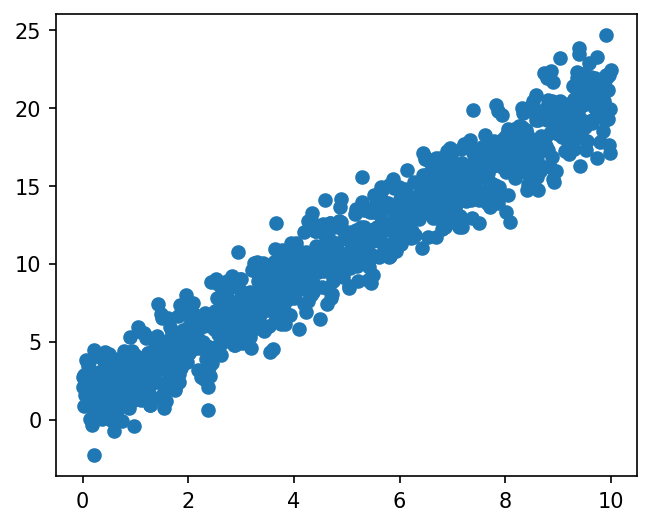

In [67]:
## Combine multiple steps into one code block

seed = 3447

n = 1000
true_m = 2
true_b = 1
true_o = 1.5

df_2 = pd.DataFrame()
df_2[ 'x' ] = np.linspace( 0, 10, n )
df_2[ 'y' ] = true_m * df_2.x + true_b + stats.norm.rvs( loc=0, scale=true_o, size=n, random_state=seed )

est_m, est_b, r = stats.linregress( df_2.x, df_2.y )[:3]
df_2[ 'fit_y' ]  = est_m * df_2.x + est_b
df_2[ 'residuals' ] = df_2.y - df_2.fit_y



fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df_2.x, df_2.y, )
ax.plot( df_2.x, df_2.fit_y, )





The points are a little too dense, and the line is the same color. We can fix by setting the scatter plot alpha and changing the line color

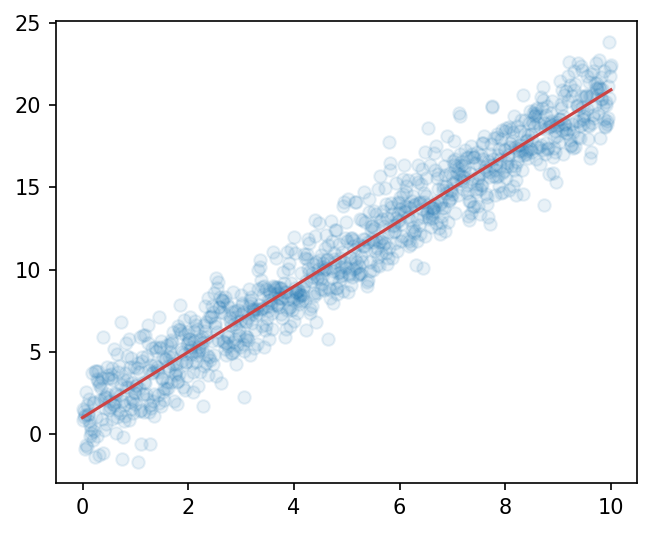

In [32]:
fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df_2.x, df_2.y, alpha=0.1, )
ax.plot( df_2.x, df_2.fit_y, color='#cc4444' )

In [33]:
df_2.residuals.describe()

count    1.000000e+03
mean    -3.357314e-15
std      1.501463e+00
min     -4.818965e+00
25%     -1.037343e+00
50%     -6.608722e-02
75%      1.065559e+00
max      5.184409e+00
Name: residuals, dtype: float64

Great, with enough data the std dev is pretty close to perfect. But how bad is it likely to be *on average* when there's only 21 points of data?

For gaussian distributions and other "simple" distributions, its probably possible to analytically derive a solution. But its fast and easy to estimate this through simulation!

In [58]:
## Let's generate 10000 replicates 

target_o = 1.5
reps = 100000
n_size = 21

rep_stds = [ ]
for rep in range( reps ): # range automatically generates an iterator from [0,value)
    ## Want to stress here that NORMALLY fixing your seeds in random number generators is dangerous, but we will do here for demonstration purposes to ensure fixed solutions
    ## Since rep will be a number between 0-999, we can use these values to function as our random seeds

    values = stats.norm.rvs( loc=0, scale=target_o, size=n_size, random_state=rep, )
    # Let's compute the sample std dev for these values and add it to a list
    value_std = np.std(  values, ddof=1, )
    rep_stds.append( value_std )

print( 'Std Mean: ' + format( np.mean( rep_stds ), '.3f' ) )
print( 'Std Median: ' + format( np.median( rep_stds ), '.3f' ) )

Std Mean: 1.482
Std Median: 1.475


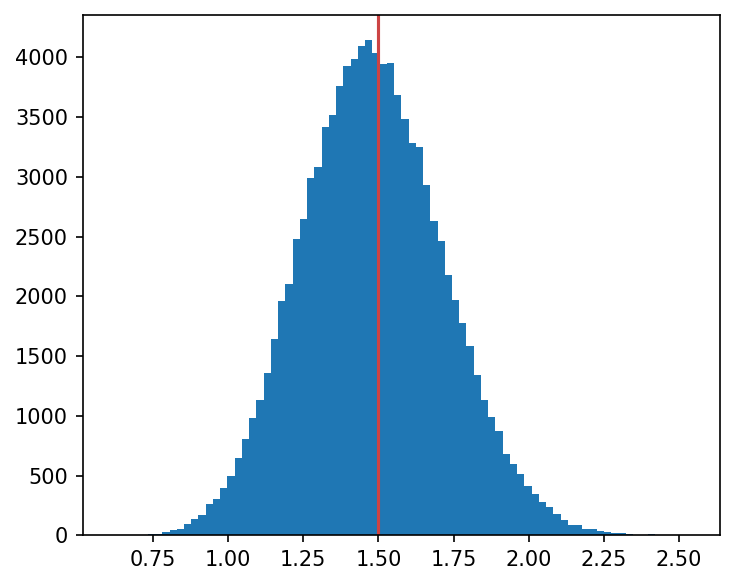

In [59]:
## Let's plot the values as a histogram

fig, ax = plt.subplots( figsize=(5,4), dpi=150, )

h = ax.hist( rep_stds, bins=80, )

## Let's draw our target point; find max height of histogram
y_max = np.max( h[0] ) * 1.05 # Increase by 5%
ax.plot( [target_o]*2, [0,y_max], color='#cc4444',  )

ax.set( ylim=(0,y_max) ) # Set the lower/upper bounds of the graph so there's no white space above red line

fig.tight_layout() ## Smoosh some of the boundaries

There does appear to be some left skew to the distribution (supported by mean and median < target). But *on average* we should have gotten a value much closer to 1.5 than what we saw for our original 21 sample value (~1.12). So how often would we have expected to have seen values <= 1.12?

Again, there's likely an analytical solution, but much easier to estimate by counting how many replicates have value <= 1.12

In [63]:
#  Python lists hold multiple elements, but are not intended for bulk mathematical operations like arrays are, so must convert first
rep_stds_array = np.array( rep_stds ) 

# Find how many values are less than our target value of ~1.12
# Get exact number

original_data_std = np.std( df.residuals, ddof = 1 )
reps_less_than_original = rep_stds_array <= original_data_std # Returns binary 0/1 array of False/True values
worse_rep_n = np.sum( reps_less_than_original ) # Sum up all those true values

worse_rep_p = worse_rep_n / len( rep_stds_array ) # Divide by the total length of the array

print( 'Our originally observed percentile is in the lower ' + format( worse_rep_p*100, '.4f' ) + ' percentile of observations' )


Our originally observed percentile is in the lower 5.9990 percentile of observations


So pretty unlikely we would observe that value too often -- but we now know it will still happen ~6% of the time!

What if the data were to follow another distribution? E.g. Laplace (defined by the mean absolute error)

r = 0.976


count    2.100000e+01
mean     6.555603e-16
std      1.318274e+00
min     -4.280468e+00
25%     -2.852223e-01
50%      1.748872e-01
75%      8.878591e-01
max      1.818503e+00
Name: residuals, dtype: float64

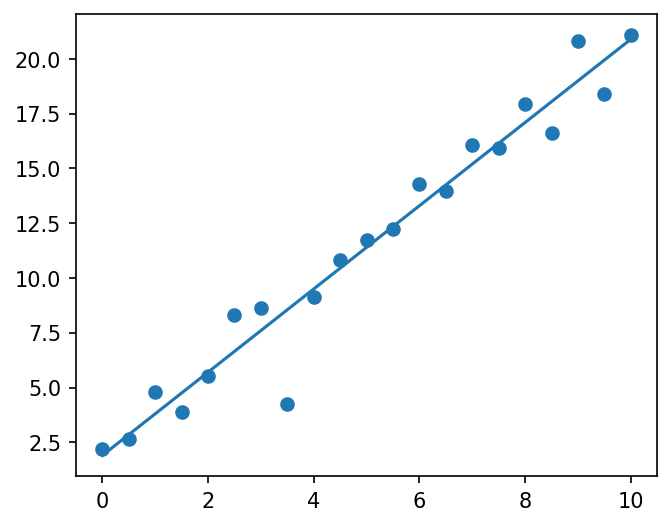

In [69]:
seed = 3447
n = 21
true_m = 2
true_b = 1
true_mae = 1.5

df_3 = pd.DataFrame()
df_3[ 'x' ] = np.linspace( 0, 10, n )
df_3[ 'y' ] = true_m * df_3.x + true_b + stats.laplace.rvs( loc=0, scale=true_o, size=n, random_state=seed, ) # Note that "norm" is replaced by "laplace"

## KEY NOTE: loc/scale mean different things for different distributions in scipy, and always need to review what they reference
## For Laplace, loc = center/mean and scale = b/mean absolute error

est_m, est_b, r = stats.linregress( df_3.x, df_3.y )[:3]
print( 'r = ' + format( r, '.3f' ) )
df_3[ 'fit_y' ]  = est_m * df_3.x + est_b
df_3[ 'residuals' ] = df_3.y - df_3.fit_y



fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df_3.x, df_3.y, )
ax.plot( df_3.x, df_3.fit_y, )


df_3.residuals.describe()

The observed R value (0.976) is a smidge lower than what we observed in our original linear regression (0.981) with a relatively biased sigma. Given a sample size of 21 data points, how often would we expect Laplace with MAE = 1.5 to provide a worse r value than normal with sigma = 1.5?

In [81]:

true_m = 2
true_b = 1

target_scale = 1.5
reps = 100000
n_size = 21

xt = np.linspace( 0, 10, n_size, )


reps_by_dist = { 'gaussian' : [ ], 'laplace' : [ ] }
for rep in range( reps ): # range automatically generates an iterator from [0,value)
    ## Want to stress here that NORMALLY fixing your seeds in random number generators is dangerous, but we will do here for demonstration purposes to ensure fixed solutions
    ## Since rep will be a number between 0-999, we can use these values to function as our random seeds

    yt = true_m * xt + true_b + stats.norm.rvs( loc=0, scale=target_scale, size=n_size, random_state=rep, )
    r_gaus = stats.linregress( xt, yt, )[2]
    reps_by_dist[ 'gaussian' ].append( r_gaus )
    yt = true_m * xt + true_b + stats.laplace.rvs( loc=0, scale=target_scale, size=n_size, random_state=rep, )
    r_laplace = stats.linregress( xt, yt, )[2]
    reps_by_dist[ 'laplace' ].append( r_laplace )
    
    
## Let's just turn both lists into arrays now
for dist in reps_by_dist:
    reps_by_dist[ dist ] = np.array( reps_by_dist[dist] )

## See how often gaussian has higher r over laplace
dist_p = np.sum( reps_by_dist[ 'gaussian' ] > reps_by_dist[ 'laplace' ] ) / reps
print( 'Gaussian error with o=1.5 is a better fit over Laplace with MAE=1.5 at approximately ' + format( dist_p*100, '.3f' ) + '% of the time' )


Gaussian error with o=1.5 is a better fit over Laplace with MAE=1.5 at approximately 83.221% of the time


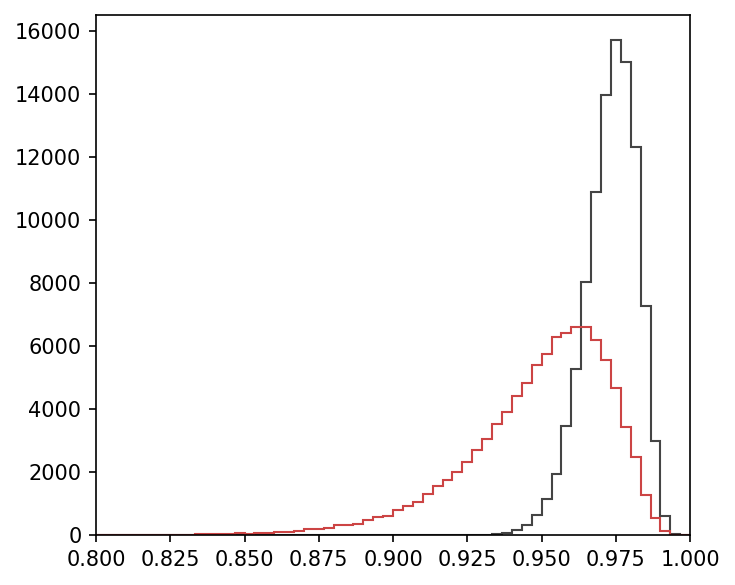

In [82]:
## Plot the data

fig, ax = plt.subplots( figsize=(5,4), dpi=150, )

ax.hist( reps_by_dist[ 'gaussian' ], bins=300, color='#444444', histtype='step', range=(0,1) ) # Change histtype to 'step' to produce lines instead of dense coloring; fix range so bin sizes are equal between plot calls
ax.hist( reps_by_dist[ 'laplace' ], bins=300, color='#cc4444', histtype='step', range=(0,1) )

ax.set( xlim=(0.8, 1.0, ) ) 
fig.tight_layout() # Eliminate some white space